In [2]:
import numpy as np
import matplotlib.pyplot as plt

import sympy

In [3]:
class StaticSystem:
    L: any

    F1: any
    F2: any

    n1: any
    n2: any

    m2: any

    points_pos: any
    points_name: any

    def __init__(self, title, start, stop):
        self.title = title
        self.L = np.linspace(stop, start, 10000)
        self.F1 = np.zeros_like(self.L, dtype=np.float64)
        self.F2 = np.zeros_like(self.L, dtype=np.float64)
        self.n1 = np.zeros_like(self.L, dtype=np.float64)
        self.n2 = np.zeros_like(self.L, dtype=np.float64)
        self.m2 = np.zeros_like(self.L, dtype=np.float64)
        self.points_pos = []
        self.points_name = []

    def addLateralForceVector(self, position, force):
        self.F2[np.argmax(self.L <= position)] = force

    def addLateralForceArea(self, start, stop, force):
        self.F1[(self.L >= start) & (self.L <= stop)] += force

    def addNormalForceVector(self, position, force):
        self.n2[np.argmax(self.L <= position)] = force

    def addNormalForceArea(self, start, stop, force):
        self.n1[(self.L >= start) & (self.L <= stop)] += force

    def addMoment(self, position, moment):
        self.m2[np.argmax(self.L <= position)] = moment

    def getQ(self):
        return np.cumsum(self.F1) * abs(self.L[1] - self.L[0]) + np.cumsum(self.F2)

    def getN(self):
        return np.cumsum(self.n1) * abs(self.L[1] - self.L[0]) + np.cumsum(self.n2)

    def getM(self):
        Q = self.getQ()
        return np.cumsum(Q) * abs(self.L[1] - self.L[0]) + np.cumsum(self.m2)

    def getPoint(self, array, position):
        return array[np.argmax(self.L <= position)]


    def addPoint(self, name, position):
        self.points_pos.append(position)
        self.points_name.append(name)

    def print_point(self, point, name):
        print(f"{name}_N = {self.getPoint(self.getN()/1000, point):0.3f}kN, {name}_Q = {self.getPoint(self.getQ()/1000, point):0.3f}kN, {name}_M = {self.getPoint(self.getM()/1000, point):0.3f}kNm")


    def plot(self):
        plt.figure(figsize=(10, 12))

        plt.subplot(5, 1, 1)
        plt.title(self.title)

        plt.plot(self.L, self.F1/1000, "--g")
        plt.fill_between(self.L, self.F1/1000, color='green', alpha=0.1)
        plt.plot(self.L, self.F2/1000, "g")
        plt.ylabel("F [N/m or N]")

        plt.subplot(5, 1, 2)
        plt.plot(self.L, self.getQ()/1000, "g")
        plt.fill_between(self.L, self.getQ()/1000, color='green', alpha=0.1)
        plt.ylabel("Q [N]")

        plt.subplot(5, 1, 3)
        plt.plot(self.L, self.getM()/1000, "g")
        plt.fill_between(self.L, self.getM()/1000, color='green', alpha=0.1)
        plt.ylabel("M [Nm]")

        # normalkräfte
        plt.subplot(5, 1, 4)
        plt.plot(self.L, self.n1/1000, "--b")
        plt.fill_between(self.L, self.n1/1000, color='b', alpha=0.1)
        plt.plot(self.L, self.n2/1000, "b")
        plt.ylabel("n [N/m or N]")

        plt.subplot(5, 1, 5)
        plt.plot(self.L, self.getN()/1000, "b")
        plt.fill_between(self.L, self.getN()/1000, color='b', alpha=0.1)
        plt.ylabel("N [N]")

        plt.xticks(ticks=self.points_pos, labels=self.points_name)

        plt.xlabel("L [m]")
        plt.show()

        for name, pos in zip(self.points_name, self.points_pos):
            self.print_point(pos, name)

In [4]:
# constants
g = 10

# lengths
l_ab = 2.5
l_bc = 2.5
l_de = 1.75
l_ef = 1.5
l_fg = 0.25
l_gh = 0.25

# masses of arms per meter
m_ab = 100
m_bc = 100
m_de = 50
m_ef = 50

# masses of electronics
m_d = 200
m_e = 200
m_f = 100
m_h = 100

# points
A = 0
B = A + l_ab
C = B + l_bc
D = C
E = D + l_de
F = E + l_ef
G = F + l_fg
H = G + l_gh

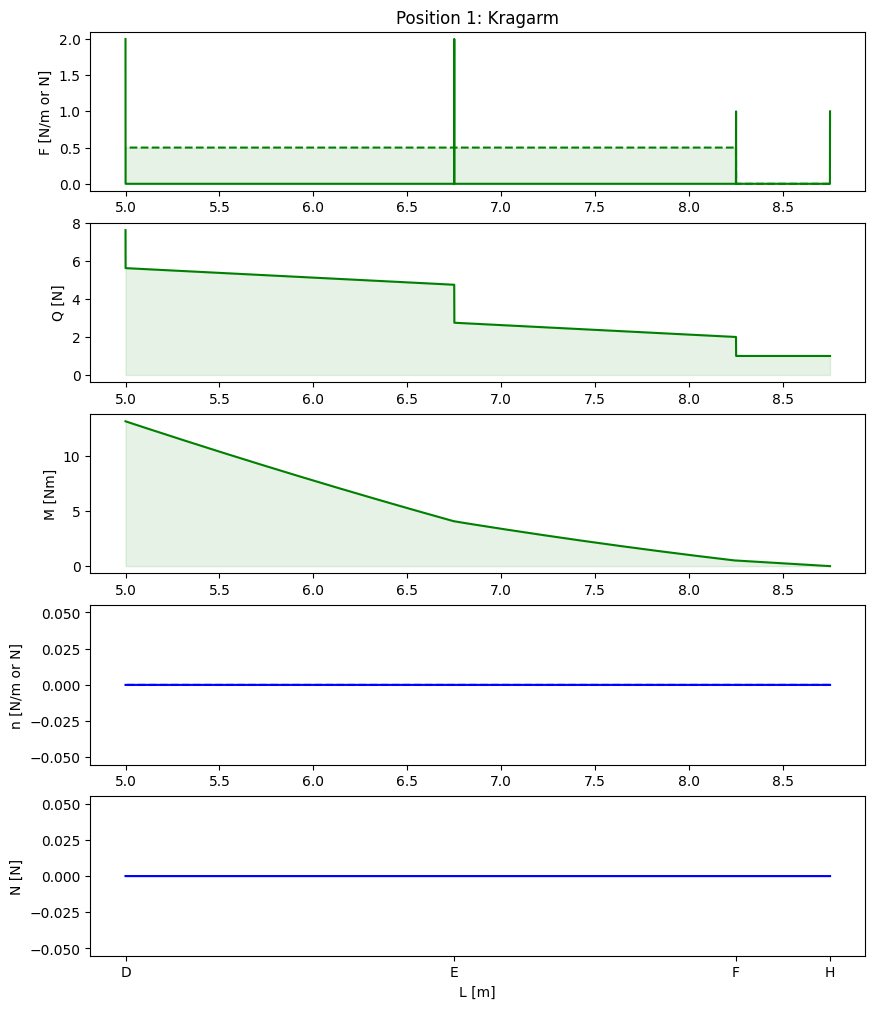

D_N = 0.000kN, D_Q = 7.625kN, D_M = 13.143kNm
E_N = 0.000kN, E_Q = 4.750kN, E_M = 4.064kNm
F_N = 0.000kN, F_Q = 2.000kN, F_M = 0.501kNm
H_N = 0.000kN, H_Q = 1.000kN, H_M = 0.000kNm


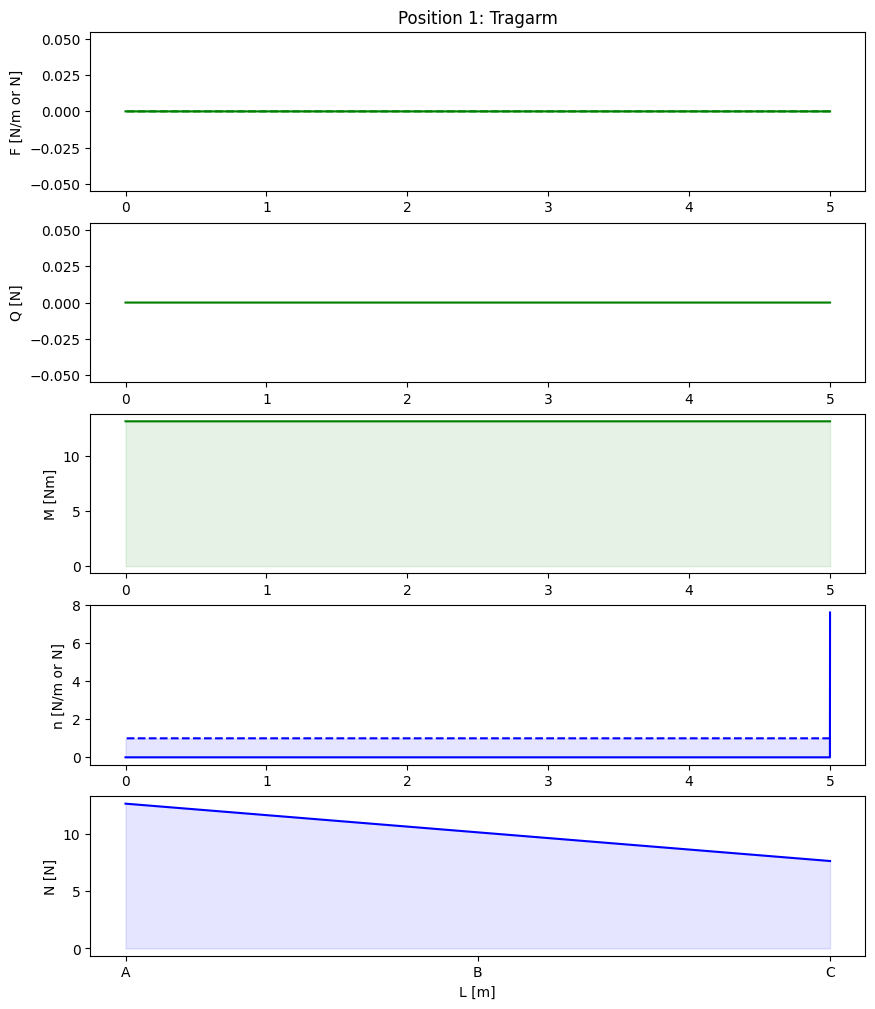

A_N = 12.626kN, A_Q = 0.000kN, A_M = 13.143kNm
B_N = 10.126kN, B_Q = 0.000kN, B_M = 13.143kNm
C_N = 7.626kN, C_Q = 0.000kN, C_M = 13.143kNm


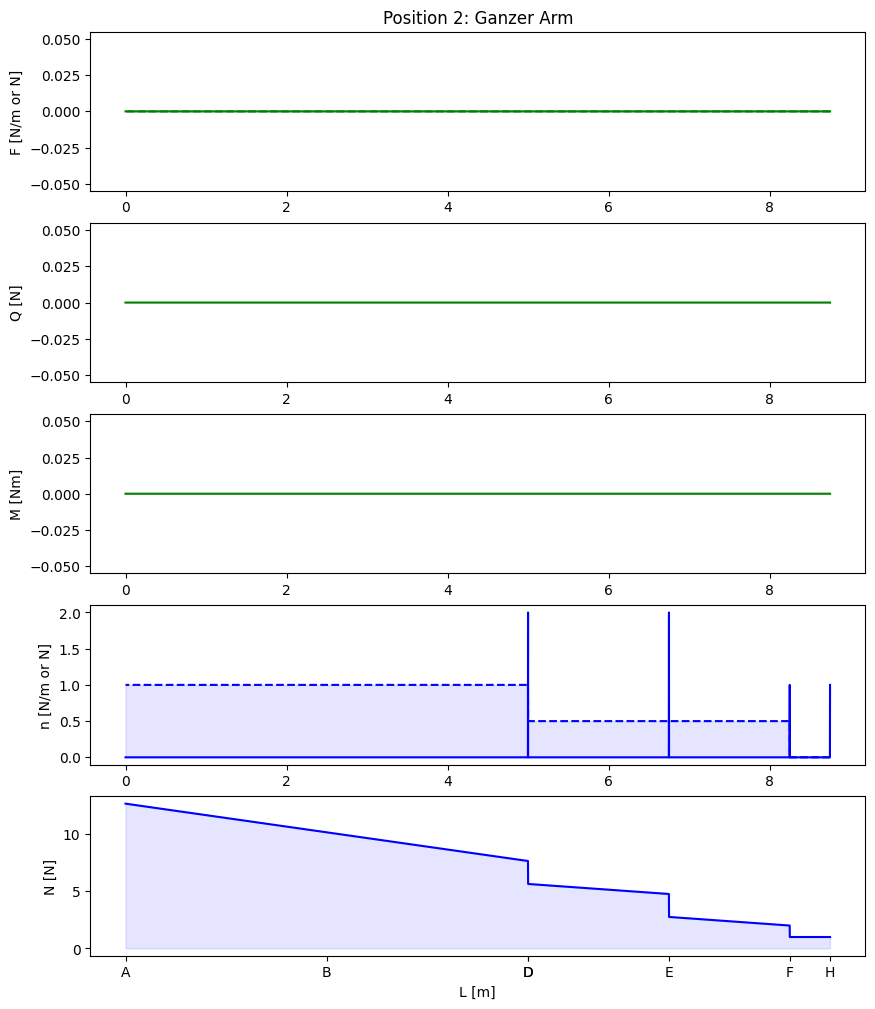

A_N = 12.625kN, A_Q = 0.000kN, A_M = 0.000kNm
B_N = 10.126kN, B_Q = 0.000kN, B_M = 0.000kNm
C_N = 7.626kN, C_Q = 0.000kN, C_M = 0.000kNm
D_N = 7.626kN, D_Q = 0.000kN, D_M = 0.000kNm
E_N = 4.750kN, E_Q = 0.000kN, E_M = 0.000kNm
F_N = 2.000kN, F_Q = 0.000kN, F_M = 0.000kNm
H_N = 1.000kN, H_Q = 0.000kN, H_M = 0.000kNm


In [5]:
s1 = StaticSystem("Position 1: Kragarm", D, H)
s1.addLateralForceVector(D, m_d * g)
s1.addLateralForceVector(E, m_e * g)
s1.addLateralForceVector(F, m_f * g)
s1.addLateralForceVector(H, m_h * g)
s1.addLateralForceArea(D, E, m_de * g)
s1.addLateralForceArea(E, F, m_ef * g)

s1.addPoint("D", D)
s1.addPoint("E", E)
s1.addPoint("F", F)
s1.addPoint("H", H)

s2 = StaticSystem("Position 1: Tragarm", A, C)
s2.addMoment(C, s1.getPoint(s1.getM(), D))
s2.addNormalForceVector(D, s1.getPoint(s1.getQ(), D))
s2.addNormalForceArea(A, B, m_ab * g)
s2.addNormalForceArea(B, C, m_bc * g)

s2.addPoint("A", A)
s2.addPoint("B", B)
s2.addPoint("C", C)

s3 = StaticSystem("Position 2: Ganzer Arm", A, H)
s3.addNormalForceVector(D, m_d * g)
s3.addNormalForceVector(E, m_e * g)
s3.addNormalForceVector(F, m_f * g)
s3.addNormalForceVector(H, m_h * g)

s3.addNormalForceArea(A, B, m_ab * g)
s3.addNormalForceArea(B, C, m_bc * g)
s3.addNormalForceArea(D, E, m_de * g)
s3.addNormalForceArea(E, F, m_ef * g)

s3.addPoint("A", A)
s3.addPoint("B", B)
s3.addPoint("C", C)
s3.addPoint("D", D)
s3.addPoint("E", E)
s3.addPoint("F", F)
s3.addPoint("H", H)

s1.plot()
s2.plot()
s3.plot()

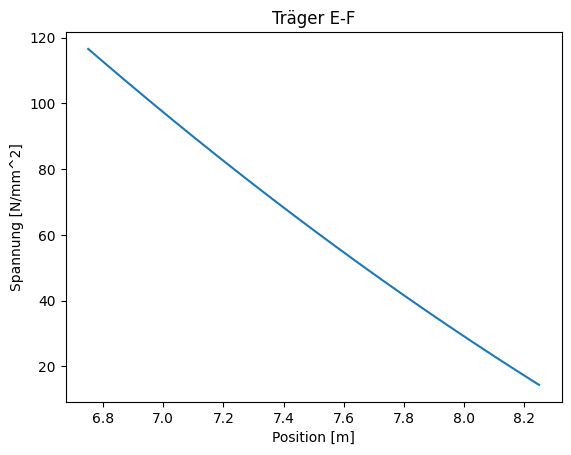

Auftretende Spannung: 117N/mm^2 - Maximal zulässige Spannung: 118N/mm^2


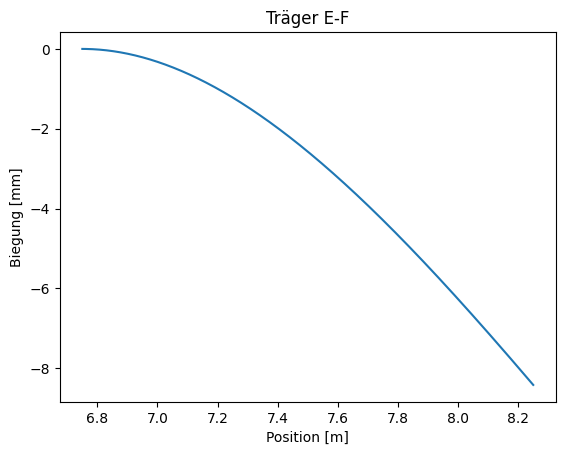

Biegesteifigkeit (für dy max 1mm): 3.129N/mm^2
2tes Flaechenmoment (für dy max 1mm): 1490cm^4


In [ ]:
# calculations E-F
E_modulus = 210000 / (0.001**2) # N/m^2
# rundprofil mit 101.6mm durchmesser und 5mm wanddicke
z_max = 101.6 / 2 * (0.001**1) # m
I_yy = 177 * (0.01**4) # m^4
Biegesteifigkeit = E_modulus * I_yy

L = s1.L[(s1.L >= E) & (s1.L <= F)]
M = s1.getM()[(s1.L >= E) & (s1.L <= F)]

# spannungsnachweis
s_max = 355
sf = 3

S = M / I_yy * z_max

plt.plot(L, S / (1000**2))
plt.title("Träger E-F")
plt.ylabel("Spannung [N/mm^2]")
plt.xlabel("Position [m]")
plt.show()

print(f"Auftretende Spannung: {np.amax(S) / (1000**2):0.0f}N/mm^2 - Maximal zulässige Spannung: {s_max / sf:0.0f}N/mm^2") 

# steifigkeitsnachweis
W1 = np.cumsum(M[::-1]) * abs(L[0] - L[1])
W2 = -np.cumsum(W1) * abs(L[0] - L[1])

plt.plot(L, W2[::-1] / Biegesteifigkeit * 1000)
plt.title("Träger E-F")
plt.ylabel("Biegung [mm]")
plt.xlabel("Position [m]")
plt.show()

dx_max = 0.001
print(f"Biegesteifigkeit (für dy max 1mm): {W2[-1] / -dx_max / 1000**2:0.3f}N/mm^2")
print(f"2tes Flaechenmoment (für dy max 1mm): {W2[-1] / -dx_max / E_modulus * (100**4):0.0f}cm^4")


In [28]:
# calculations D-E

# profil (rechteckprofil)
E_modulus = 210000 / (0.001**2) # N/m^2
traegheitsradius = 5.27 * 0.01 # m
I_t = 2272 * (0.01**4) # m^4
W_t = I_t / traegheitsradius

z_max = (2 * 70**2)**(1/2) * (0.001**1) # m
I_yy = 1416 * (0.01**4) # m^4
Biegesteifigkeit = E_modulus * I_yy


N_x = 0
Q_y = 0
Q_z = 6000
M_x = 3000
M_y = 15000
M_z = 0

# spannungsnachweis
# torsionsspannung
tau_max = M_x / W_t
print(f"T_Max: {tau_max / (1000**2)} N/mm^2")

# biegespannung
s_max = 355
sf = 3
S_y = M_y / I_yy * z_max


print(f"Auftretende Spannung S_y: {S_y / (1000**2):0.0f}N/mm^2") 
print(f"Maximal zulässige Spannung: {s_max / sf:0.0f}N/mm^2") 

T_Max: 6.95862676056338 N/mm^2
Auftretende Spannung S_y: 105N/mm^2
Maximal zulässige Spannung: 118N/mm^2
